# Regression Problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
X_train = np.load('Xtrain_Regression_Part1.npy')
Y_train = np.load('Ytrain_Regression_Part1.npy')
X_final = np.load('Xtest_Regression_Part1.npy')

### Convert Array to DataFrame

In [3]:
Y_train = pd.DataFrame(Y_train)
X_train = pd.DataFrame(X_train)
X_final = pd.DataFrame(X_final)


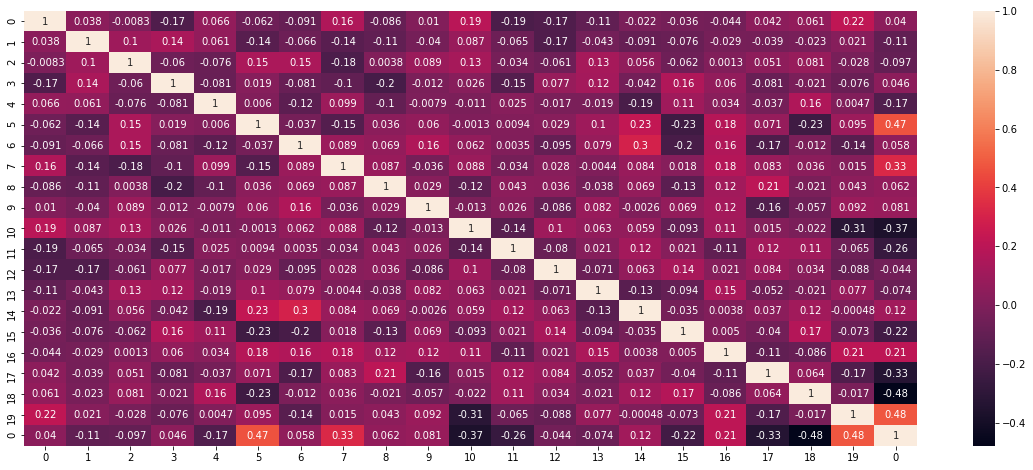

In [4]:
plt.figure(figsize=(20,8))
sns.heatmap(pd.concat([X_train,Y_train], axis = 1).corr(), annot = True)

# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score #Gives the parameter in scoring for each cv fold
from sklearn import model_selection

In [6]:
LR = LinearRegression()
# We see the mean_squared_error of every fold with cross validation using the following line
CV_scoreLR = abs(cross_val_score(LR, X_train, Y_train, cv=15, scoring='neg_mean_squared_error' ))
# Here we make the average to obtain the MSE of all model
MSE_linear= CV_scoreLR.mean()

In [7]:
MSE_linear

0.015382281402319977

#### Predictions

In [8]:
LR.fit(X_train,Y_train)
Lr_pred = LR.predict(X_final)

# Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
PR = PolynomialFeatures(degree=3)
X_train_scaled=PR.fit_transform(X_train)
CV_scorePR = abs(cross_val_score(LR, X_train_scaled, Y_train, cv=15, scoring='neg_mean_squared_error' ))
MSE_poly= CV_scorePR.mean()

In [11]:
MSE_poly

3.826610118441785

# Lasso

In [12]:
import sklearn.linear_model as linear

#### Finding the parameters 

Criar uma matriz para guardar os coeficientes Lasso

In [13]:
alpha= np.arange(0.001,10,0.1)
aux=0
space=0

In [14]:
lasso_coef=np.ones((alpha.size,20),dtype=float)


In [15]:
for aux in alpha :
    Lasso = linear.Lasso(alpha=aux, max_iter=1000)
    Lasso.fit(X_train,Y_train)
    lasso_coef[space,:]=Lasso.coef_
    space=space+1

No handles with labels found to put in legend.


Text(0, 0.5, 'Coeficientes de Lasso')

<Figure size 432x288 with 0 Axes>

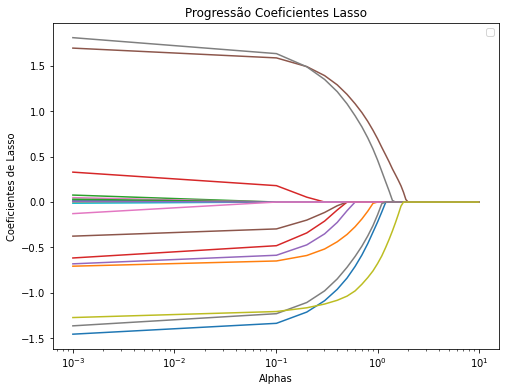

In [16]:
plt.figure()
plt.figure(figsize=(8,6))

for n in range(0,19) :
    plt.plot(alpha, lasso_coef[:,n])

plt.xscale('log')
plt.legend()
plt.title('Progressão Coeficientes Lasso')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Lasso')

#### Cross Validation 

In [19]:
Lasso = linear.Lasso(alpha=0.001)
CV_scoreLasso = abs(cross_val_score(Lasso, X_train, Y_train, cv=15, scoring='neg_mean_squared_error' ))
MSE_Lasso= CV_scoreLasso.mean()

In [20]:
MSE_Lasso

0.015251728098541306